In [35]:
import pandas as pd
import numpy as np

df = pd.read_csv('hospitals_coordinates.csv')

df['Latitude'] = df['Latitude'].bfill()
df['Longitude'] = df['Longitude'].bfill()
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Number of Reviews'] = df['Number of Reviews'].fillna(df['Number of Reviews'].median())

df['Effective Rating'] = df['Rating'] * np.log(df['Number of Reviews'] + 1)

min_effective_rating = df['Effective Rating'].min()
max_effective_rating = df['Effective Rating'].max()

df['Effective Rating'] = 5 * (df['Effective Rating'] - min_effective_rating) / (max_effective_rating - min_effective_rating)

df.to_csv('hospital_dataset_cleaned.csv', index=False)

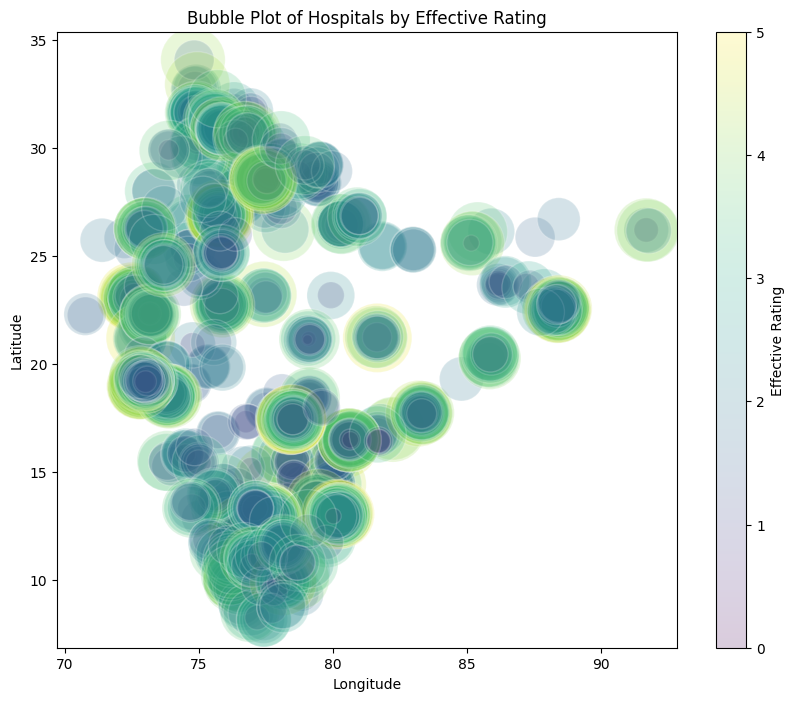

In [34]:
# generate bubble plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], s=df['Effective Rating']*512, c=df['Effective Rating'], alpha=0.2, edgecolors='w')
plt.colorbar(label='Effective Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bubble Plot of Hospitals by Effective Rating')
plt.savefig('initial_bubble_plot.png')